# Diabetes Prediction System

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
## Loading the Diabetes Dataset

In [3]:
diabetes_dataset=pd.read_csv(r'diabetes.csv')

In [83]:
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# pd.read_csv?

In [6]:
# Number of rows and columns in this dataset

In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
## Getting the statistical measures of this dataset

In [9]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

 Here,
    0 means Non-diabetes & 
    1 means diabetes

In [11]:
#Now we try to get the mean for all those value for this label zero and one
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
## Separting the data and labels

In [13]:
X=diabetes_dataset.drop(columns='Outcome',axis=1)

In [14]:
y=diabetes_dataset['Outcome']

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Data Standardization 

In [17]:
sc=StandardScaler()

In [18]:
standardized_data=sc.fit_transform(X)

In [19]:
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [20]:
X=standardized_data

In [21]:
Y=diabetes_dataset['Outcome']

In [22]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting the data into train and test

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y)

In [24]:
## Shape of X_train and X_test comapring with X

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (537, 8) (231, 8)


In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Training the model

In [27]:
## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr_classifier=LogisticRegression(random_state=51,penalty='l2')
lr_classifier.fit(X_train,Y_train)

y_pred_lr=lr_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_lr)

0.7792207792207793

In [30]:
## K-Nearest Neighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn_classifier=KNeighborsClassifier(n_neighbors=15,metric='minkowski',p=2)
knn_classifier.fit(X_train,Y_train)
y_pred_knn=knn_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_knn)

0.7575757575757576

In [33]:
## Naive Bayes Classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

nb_classifier=GaussianNB()
nb_classifier.fit(X_train,np.ravel(Y_train))

y_pred_nb=nb_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_nb)

0.7748917748917749

In [35]:
## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=2)
dt_classifier.fit(X_train,Y_train)

y_pred_dt=dt_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_dt)

0.7445887445887446

In [38]:

dt_classifier2=DecisionTreeClassifier(criterion='gini',random_state=2,max_depth=3)
dt_classifier2.fit(X_train,Y_train)

y_pred_dt_gini=dt_classifier2.predict(X_test)
print(accuracy_score(Y_test,y_pred_dt_gini))

0.7532467532467533


In [39]:
## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf_classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=51,max_depth=7)
rf_classifier.fit(X_train,Y_train)

y_pred_rf=rf_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

0.7662337662337663

In [64]:
rf_classifier2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=4)
rf_classifier2.fit(X_train,Y_train)

y_pred_rf_gini=rf_classifier2.predict(X_test)
print(accuracy_score(Y_test,y_pred_rf_gini))

0.7748917748917749


In [65]:
## SVM

In [66]:
svm_classifier=svm.SVC(kernel='linear')
svm_classifier.fit(X_train,Y_train)

y_pred_svm=svm_classifier.predict(X_test)
accuracy_score(Y_test,y_pred_svm)

0.7748917748917749

In [67]:
print(" Accurracy Score of different Classification Algorithm")

print(f" For Logistic Regression: {accuracy_score(Y_test,y_pred_lr)}\n")
print(f" For K Nearest Neighbors: {accuracy_score(Y_test,y_pred_knn)}\n")
print(f" For Naive Baiyes:        {accuracy_score(Y_test,y_pred_nb)}\n")
print(f" For Decision Tree 1:     {accuracy_score(Y_test,y_pred_dt)}\n")
print(f" For Decision Tree 2:     {accuracy_score(Y_test,y_pred_dt_gini)}\n")
print(f" For Random Forest 1:     {accuracy_score(Y_test,y_pred_rf)}\n")
print(f" For Random Forest 2:     {accuracy_score(Y_test,y_pred_rf_gini)}\n")
print(f" For SVM:                 {accuracy_score(Y_test,y_pred_svm)}\n")

 Accurracy Score of different Classification Algorithm
 For Logistic Regression: 0.7792207792207793

 For K Nearest Neighbors: 0.7575757575757576

 For Naive Baiyes:        0.7748917748917749

 For Decision Tree 1:     0.7445887445887446

 For Decision Tree 2:     0.7532467532467533

 For Random Forest 1:     0.7662337662337663

 For Random Forest 2:     0.7748917748917749

 For SVM:                 0.7748917748917749



# Confusion Tree

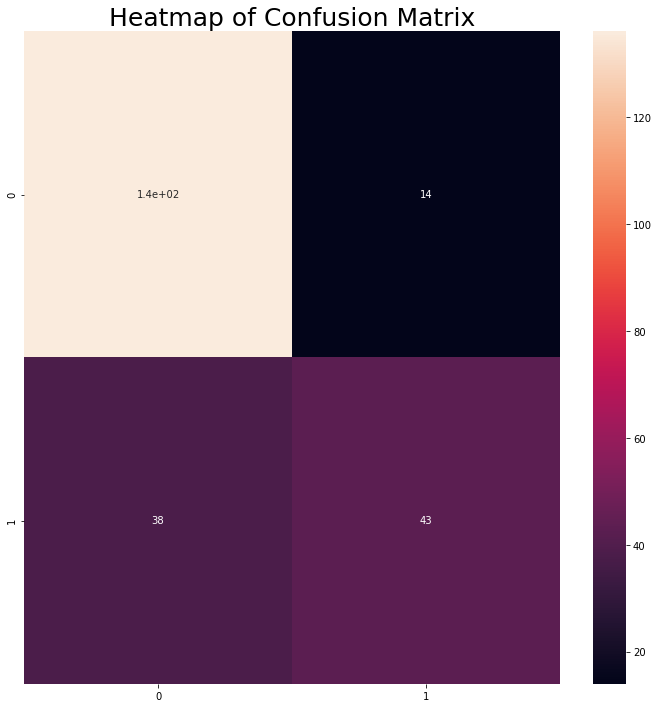

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
cm=confusion_matrix(Y_test,y_pred_rf_gini)

plt.title("Heatmap of Confusion Matrix",fontsize=25)
sns.heatmap(cm,annot=True)
plt.show()

# Classification Report

In [69]:
print(classification_report(Y_test,y_pred_rf_gini))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.75      0.53      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cross_validation_rf_gini=cross_val_score(estimator=rf_classifier2,X=X_train,y=Y_train,cv=20)

In [72]:
cross_validation_rf_gini

array([0.81481481, 0.7037037 , 0.88888889, 0.85185185, 0.81481481,
       0.85185185, 0.81481481, 0.7037037 , 0.62962963, 0.77777778,
       0.74074074, 0.81481481, 0.7037037 , 0.62962963, 0.66666667,
       0.77777778, 0.66666667, 0.80769231, 0.73076923, 0.80769231])

In [73]:
print("Cross Validation accuracy for Random Forest Gini for 10 Different experiment is {}\n".format(cross_validation_rf_gini))

print("Cross Validation Mean accuracy of Random Forest Gini is {}".format(cross_validation_rf_gini.mean()))

Cross Validation accuracy for Random Forest Gini for 10 Different experiment is [0.81481481 0.7037037  0.88888889 0.85185185 0.81481481 0.85185185
 0.81481481 0.7037037  0.62962963 0.77777778 0.74074074 0.81481481
 0.7037037  0.62962963 0.66666667 0.77777778 0.66666667 0.80769231
 0.73076923 0.80769231]

Cross Validation Mean accuracy of Random Forest Gini is 0.7599002849002848


# Saving Models using pickle

In [74]:
import pickle

In [75]:
## Saving It

In [76]:
pickle.dump(rf_classifier2,open('diabetes_predictor.pickle','wb'))

In [77]:
## Loading file

In [78]:
diabetes_predictor_model=pickle.load(open('diabetes_predictor.pickle','rb'))

In [79]:
y_pred=diabetes_predictor_model.predict(X_test)

In [80]:
## Confusion Matrix

print("Confusion Matrix:\n{}".format(confusion_matrix(Y_test,y_pred)))

Confusion Matrix:
[[136  14]
 [ 38  43]]


In [81]:
## Accuracy

print("Accuracy is: {}".format(accuracy_score(Y_test,y_pred)))

Accuracy is: 0.7748917748917749
